<a href="https://colab.research.google.com/github/kanchandhole/Data-Scientist/blob/main/Evaluation_Metrics_and_Regression_practical_assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [173]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [174]:
df = sns.load_dataset('diamonds')

In [175]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [176]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [177]:
df.duplicated().sum()

np.int64(146)

In [178]:
df.shape

(53940, 10)

In [179]:
df1 = df.drop_duplicates().reset_index(drop=True)

In [180]:
df1.duplicated().sum()

np.int64(0)

In [181]:
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [182]:
df1.shape

(53794, 10)

**1.** Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

In [183]:
features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [184]:
features

['carat', 'depth', 'table', 'x', 'y', 'z']

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [186]:
X = df1[features]
y = df1['price']

In [187]:
X

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53789,0.72,60.8,57.0,5.75,5.76,3.50
53790,0.72,63.1,55.0,5.69,5.75,3.61
53791,0.70,62.8,60.0,5.66,5.68,3.56
53792,0.86,61.0,58.0,6.15,6.12,3.74


In [188]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53789,2757
53790,2757
53791,2757
53792,2757


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

In [190]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40345, 6), (13449, 6), (40345,), (13449,))

In [191]:
model = LinearRegression()

In [192]:
model

LinearRegression()

In [193]:
model.fit(X_train, y_train)

LinearRegression()

In [194]:
y_pred = model.predict(X_test)

In [195]:
y_pred

array([ 224.76036753, 5301.1329556 ,  773.70810499, ..., 2191.48588974,
       1393.27038867, 2913.22098681])

In [196]:
residuals = y_test - y_pred

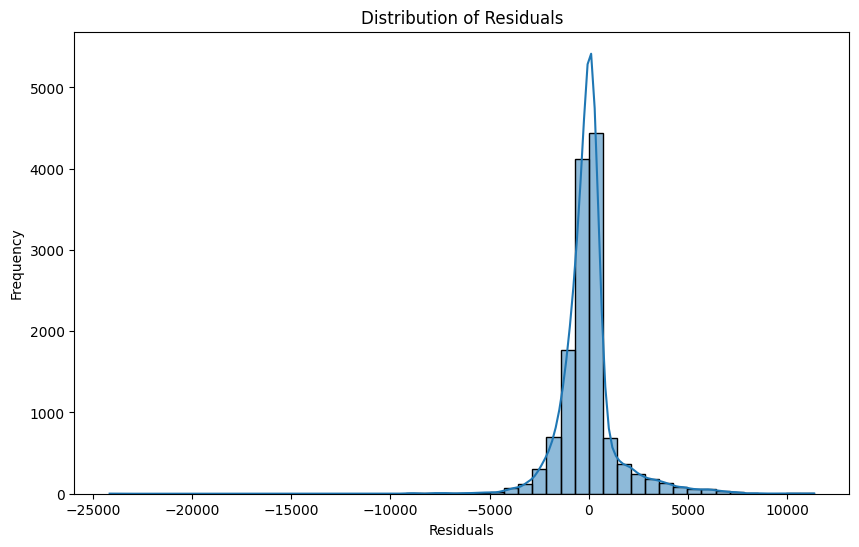

In [197]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins = 50, kde=True )
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**2.** Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [198]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

In [199]:
mse = mean_squared_error(y_test, y_pred)

In [200]:
mse

2221738.688542673

In [201]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

882.5668444227271


In [202]:
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

1490.5497940500588


**3.** Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

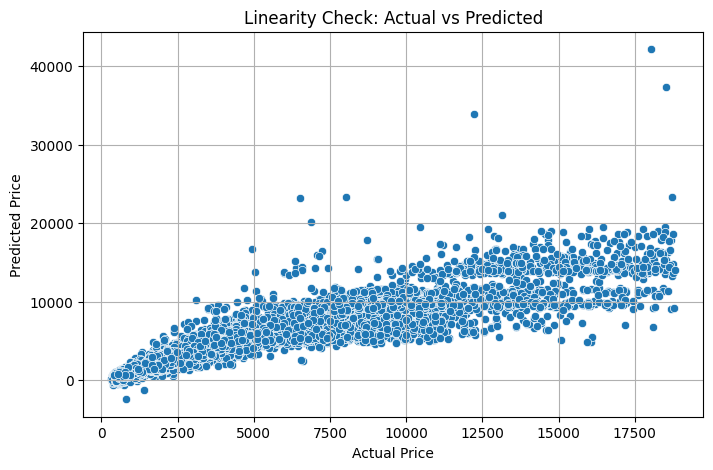

In [203]:
# check linearity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Linearity Check: Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

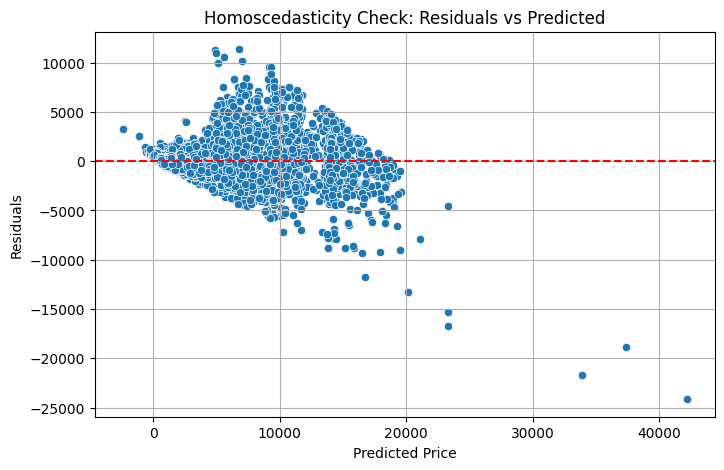

In [204]:
#homoscedastity>>

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [205]:
corr = X.corr()

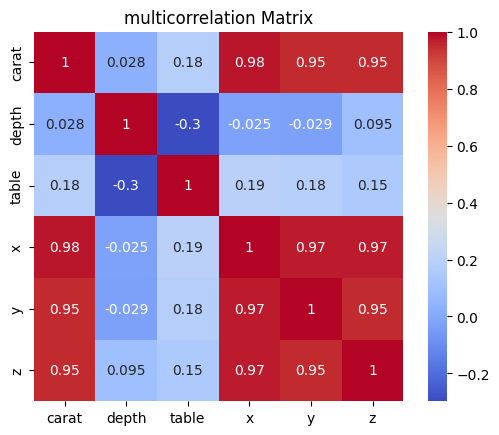

In [206]:
#correlation matrix for multicollinearity
sns.heatmap(corr , annot= True, cmap='coolwarm', square = True)
plt.title('multicorrelation Matrix')
plt.show()

**4. **Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models.

In [207]:
from sklearn.linear_model import Ridge , Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])


In [208]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [209]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [210]:
  results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 4)
 })

In [211]:
results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\nModel Performance Comparison:\n")
print(results_df.to_string(index=False))


Model Performance Comparison:

           Model    RMSE  R² Score
Lasso Regression 1489.96    0.8531


**5.** Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [212]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [213]:
data = sns.load_dataset('tips')

In [214]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [215]:
data.duplicated().sum()

np.int64(1)

In [216]:
data1 = data.drop_duplicates().reset_index(drop = True)

In [217]:
data1.duplicated().sum()

np.int64(0)

In [218]:
data1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,29.03,5.92,Male,No,Sat,Dinner,3
239,27.18,2.00,Female,Yes,Sat,Dinner,2
240,22.67,2.00,Male,Yes,Sat,Dinner,2
241,17.82,1.75,Male,No,Sat,Dinner,2


In [219]:
data1.shape

(243, 7)

In [220]:
X = data1[['total_bill']]
y = data1['tip']

In [221]:
X

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
238,29.03
239,27.18
240,22.67
241,17.82


In [222]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
238,5.92
239,2.00
240,2.00
241,1.75


In [223]:
from sklearn.model_selection import train_test_split

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [225]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((182, 1), (182,), (61, 1), (61,))

In [226]:
from sklearn.linear_model import LinearRegression

In [227]:
model = LinearRegression()

In [228]:
model

LinearRegression()

In [229]:
model.fit(X_train , y_train)

LinearRegression()

In [230]:
model.coef_

array([0.10107401])

In [231]:
model.intercept_

np.float64(1.0143860862196852)

In [232]:
print("The slope or coeff of model is ", model.coef_)
print("The intercept of the model is ", model.intercept_)

The slope or coeff of model is  [0.10107401]
The intercept of the model is  1.0143860862196852


In [233]:
y_pred = model.predict(X_test)

In [234]:
y_pred

array([3.01767306, 1.9008052 , 2.75892358, 2.10295323, 3.94856474,
       4.33972118, 3.85961961, 2.43649748, 2.50826003, 3.43510874,
       2.86302982, 4.05267098, 2.356649  , 6.14995679, 2.03220142,
       2.29398312, 4.332646  , 3.19556333, 2.67705363, 2.48198078,
       3.10560746, 3.1015645 , 2.85797612, 1.97964293, 3.10560746,
       2.78419209, 2.05241622, 3.56953718, 2.66391401, 4.03144543,
       1.74717269, 1.79669896, 2.81451429, 3.06517785, 2.72961212,
       1.87553669, 3.77168521, 2.0594914 , 2.4445834 , 3.30573401,
       2.07667398, 2.09082435, 4.86227384, 2.05848066, 1.77850564,
       1.32468331, 4.2194431 , 2.90345943, 4.5166007 , 2.76397729,
       3.46745243, 2.36776715, 2.14338283, 2.62954885, 2.98431864,
       2.3313805 , 2.65279587, 1.98469663, 2.65886031, 2.60023738,
       3.01261936])

In [235]:
r2_score(y_test, y_pred)

0.48293064580649314

**6.** Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

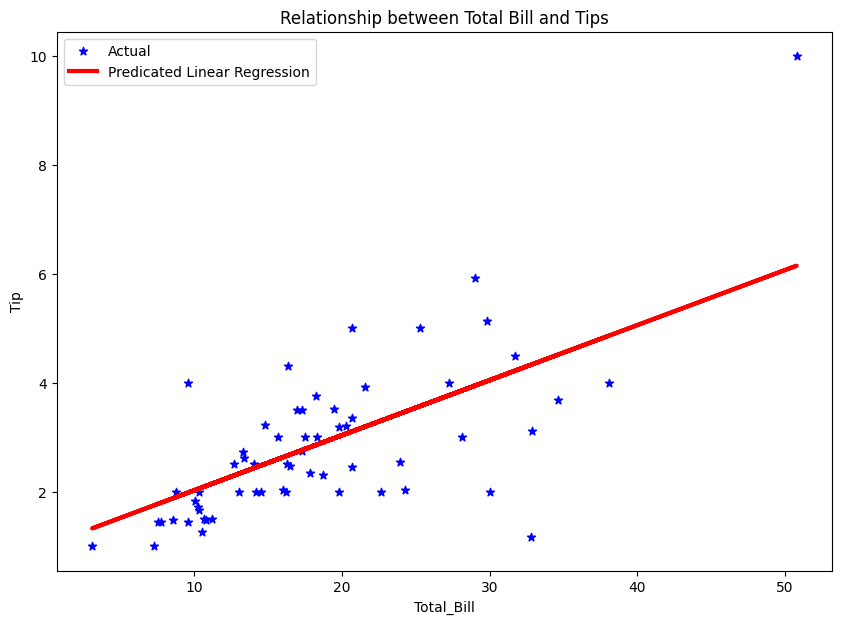

In [236]:
plt.figure(figsize= (10,7))
plt.scatter(X_test, y_test, color = 'blue', label ='Actual', marker= '*')
plt.plot(X_test , y_pred, color = 'red', linewidth = 3, label= 'Predicated Linear Regression')
plt.title('Relationship between Total Bill and Tips' )
plt.xlabel('Total_Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()

**Q7.**Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

In [237]:
# Set random seed for reproducibility
np.random.seed(42)

In [238]:
# Generate synthetic data
X = 2 * np.random.rand(100, 1)  # 100 data points, one feature
y = 4 + 3 * X.flatten() + np.random.randn(100)  # y = 4 + 3x + noise

In [239]:
# Reshape y to be a 1D array
y = y.reshape(-1)

In [240]:
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [241]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
model = LinearRegression()

In [244]:
model

LinearRegression()

In [245]:
model.fit(X_train, y_train)

LinearRegression()

In [246]:
y_pred = model.predict(X_test)

In [247]:
y_pred

array([4.49875411, 9.15273606, 8.46643942, 7.85214193, 5.59173117,
       6.6071719 , 5.77852817, 8.975125  , 4.25815864, 6.23983135,
       6.56122114, 7.54434267, 8.70839426, 9.45538878, 4.81247932,
       5.01640666, 8.46098398, 4.55746321, 8.80346608, 5.09761775])

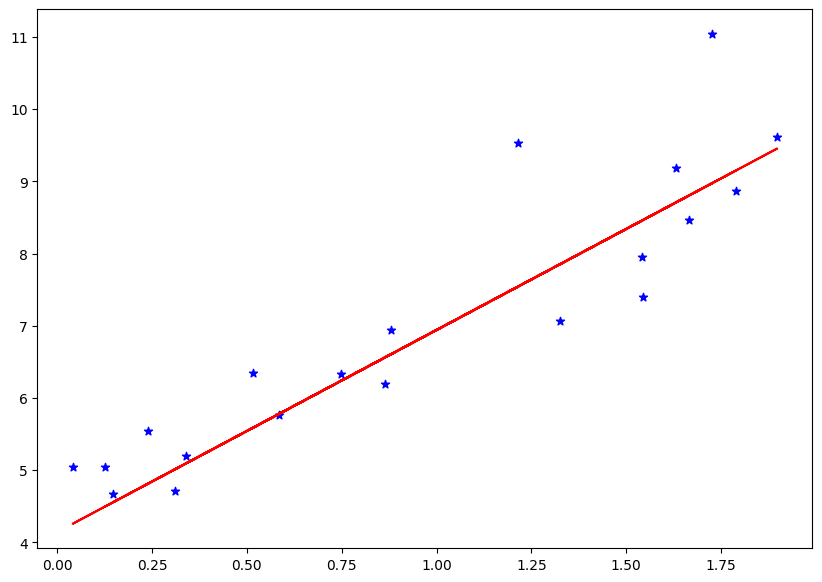

In [248]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test, color = 'blue', marker ='*')
plt.plot(X_test, y_pred, color ="red")
plt.show()

**8.**Write a Python script that pickles a trained linear regression model and saves it to a file.

In [249]:
import pickle

In [250]:
model

LinearRegression()

In [251]:
pickle.dump(model, open("model.pkl", "wb"))

In [252]:
model = pickle.load(open("model.pkl", "rb"))

In [253]:
print("Model has been trained and saved to 'model.pkl'")

Model has been trained and saved to 'model.pkl'


**9.**Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

In [254]:
np.random.seed(1)

In [255]:
#generate synthtic X
X = 2*np.random.rand(100, 1)

In [256]:
#generate random synthetic y using X
y = 4 + 3*X+1.5*X**2 + np.random.randn(100, 1)

In [257]:
X

array([[8.34044009e-01],
       [1.44064899e+00],
       [2.28749635e-04],
       [6.04665145e-01],
       [2.93511782e-01],
       [1.84677190e-01],
       [3.72520423e-01],
       [6.91121454e-01],
       [7.93534948e-01],
       [1.07763347e+00],
       [8.38389029e-01],
       [1.37043900e+00],
       [4.08904499e-01],
       [1.75623487e+00],
       [5.47751864e-02],
       [1.34093502e+00],
       [8.34609605e-01],
       [1.11737966e+00],
       [2.80773877e-01],
       [3.96202978e-01],
       [1.60148914e+00],
       [1.93652315e+00],
       [6.26848356e-01],
       [1.38464523e+00],
       [1.75277830e+00],
       [1.78921333e+00],
       [1.70088423e-01],
       [7.81095665e-02],
       [3.39660839e-01],
       [1.75628501e+00],
       [1.96693668e-01],
       [8.42215250e-01],
       [1.91577906e+00],
       [1.06633057e+00],
       [1.38375423e+00],
       [6.31031262e-01],
       [1.37300186e+00],
       [1.66925134e+00],
       [3.65765547e-02],
       [1.50028863e+00],


In [258]:
y

array([[ 7.86121109],
       [ 9.41295   ],
       [ 3.69448231],
       [ 7.19039999],
       [ 5.23985383],
       [ 5.36720125],
       [ 5.10339032],
       [ 6.58907959],
       [ 7.51171281],
       [ 9.38489289],
       [ 7.76781105],
       [11.04748023],
       [ 4.80685555],
       [14.2728098 ],
       [ 4.29064731],
       [11.84944906],
       [ 8.74760648],
       [ 9.41010133],
       [ 4.58528764],
       [ 4.78534373],
       [13.07511295],
       [15.5120924 ],
       [ 6.12609969],
       [11.07339618],
       [13.24668175],
       [14.86759851],
       [ 4.10653181],
       [ 5.46798806],
       [ 5.59552839],
       [14.48923908],
       [ 3.55320176],
       [ 7.76001797],
       [15.99320774],
       [ 7.95088243],
       [10.75720782],
       [ 6.52300901],
       [ 9.57358939],
       [13.5025135 ],
       [ 4.95789708],
       [11.01764891],
       [16.15079003],
       [10.53522159],
       [ 6.11586144],
       [10.85767477],
       [ 5.8047074 ],
       [ 8

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state=42)

In [260]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

In [261]:
from sklearn.preprocessing import PolynomialFeatures

In [262]:
poly_features = PolynomialFeatures(degree= 2 , include_bias= False)

In [263]:
X_poly_train = poly_features.fit_transform(X_train)

In [264]:
X_poly_train

array([[1.06725090e-01, 1.13902449e-02],
       [1.32688300e+00, 1.76061848e+00],
       [1.70088423e-01, 2.89300716e-02],
       [5.60887984e-01, 3.14595331e-01],
       [1.17311008e+00, 1.37618726e+00],
       [1.34093502e+00, 1.79810673e+00],
       [1.97772218e+00, 3.91138501e+00],
       [1.80675904e+00, 3.26437823e+00],
       [1.07763347e+00, 1.16129389e+00],
       [2.78552695e-01, 7.75916036e-02],
       [1.37043900e+00, 1.87810305e+00],
       [5.87228297e-01, 3.44837073e-01],
       [1.79177244e+00, 3.21044846e+00],
       [3.39660839e-01, 1.15369486e-01],
       [1.15677923e+00, 1.33813818e+00],
       [1.84677190e-01, 3.41056643e-02],
       [1.32758929e+00, 1.76249332e+00],
       [1.07179281e+00, 1.14873983e+00],
       [6.31031262e-01, 3.98200454e-01],
       [8.34609605e-01, 6.96573192e-01],
       [2.60057144e-01, 6.76297183e-02],
       [1.38375423e+00, 1.91477576e+00],
       [6.91121454e-01, 4.77648864e-01],
       [4.74053960e-01, 2.24727157e-01],
       [7.810956

In [265]:
from sklearn.linear_model import LinearRegression

In [266]:
poly_model = LinearRegression()

In [267]:
poly_model

LinearRegression()

In [268]:
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [269]:
y_poly_predict = poly_model.predict(X_poly_train)

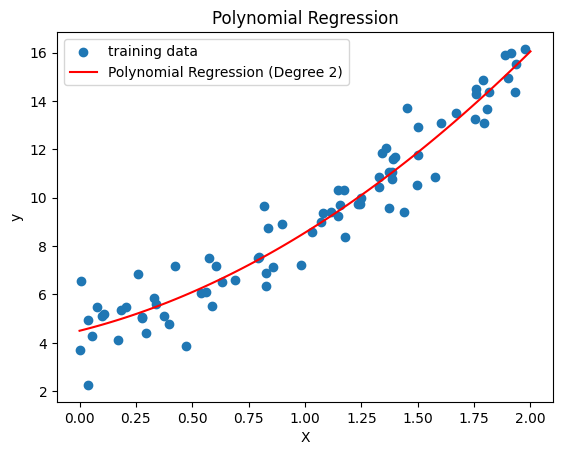

In [270]:
degree = 2
plt.scatter(X_train, y_train, label = "training data")
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, poly_model.predict(X_range_poly), color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

**10.** Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [271]:
from numpy import random
np.random.seed(42)
X = np.random.rand(100,1)*10

In [272]:
true_slope = 3.5
true_intercept = 7

In [273]:
noise = np.random.randn(100,1)*4

In [274]:
y = true_slope *X + true_intercept +noise

In [275]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [276]:
y

array([[20.45709243],
       [39.07897132],
       [32.98683107],
       [20.00277129],
       [11.58196486],
       [13.8882585 ],
       [14.9445026 ],
       [35.24308423],
       [24.805051  ],
       [29.77551205],
       [11.38206577],
       [42.26184926],
       [34.01645161],
       [16.48493861],
       [13.75218405],
       [17.29373781],
       [14.84026613],
       [24.05582652],
       [20.54964304],
       [11.33896011],
       [29.59933242],
       [12.92650621],
       [17.24551653],
       [18.88431598],
       [17.30096648],
       [32.79857736],
       [12.61772431],
       [21.78909627],
       [27.08936706],
       [10.24196787],
       [35.80881342],
       [13.66665558],
       [10.30700732],
       [39.91321014],
       [33.1220363 ],
       [35.18785168],
       [17.90240276],
       [20.27149244],
       [30.17871207],
       [23.61152665],
       [11.13249114],
       [19.6564797 ],
       [12.7748895 ],
       [41.8339462 ],
       [19.22142714],
       [26

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size= 0.20 , random_state = 42)

In [279]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

In [280]:
from sklearn.linear_model import LinearRegression

In [281]:
model = LinearRegression()

In [282]:
model

LinearRegression()

In [283]:
model.fit(X_train , y_train)

LinearRegression()

In [284]:
model.coef_

array([[3.33945893]])

In [285]:
model.intercept_

array([7.57165328])

In [286]:
print('model coefficient is:',model.coef_)
print('model intercept is:',model.intercept_)

model coefficient is: [[3.33945893]]
model intercept is: [7.57165328]


**11.**Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

In [287]:
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**3 - 3 * X**2 + X + np.random.normal(0, 3, size=X.shape)

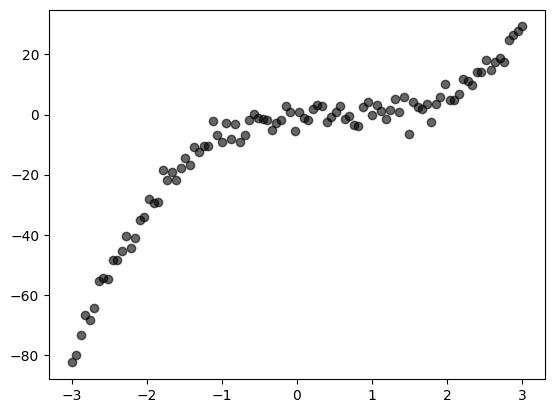

In [288]:
plt.scatter(X, y, color='black', label='Data', alpha=0.6)

In [289]:
degrees = [1, 2, 3, 4, 5]
colors = ['red', 'green', 'blue', 'purple', 'orange']

In [290]:
print("Degree | MSE     | R² Score")
print("----------------------------")
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

Degree | MSE     | R² Score
----------------------------


In [291]:
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)


In [292]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [293]:
print(f"{degree:^6} | {mse:7.2f} | {r2:8.4f}")

  5    |    6.87 |   0.9882


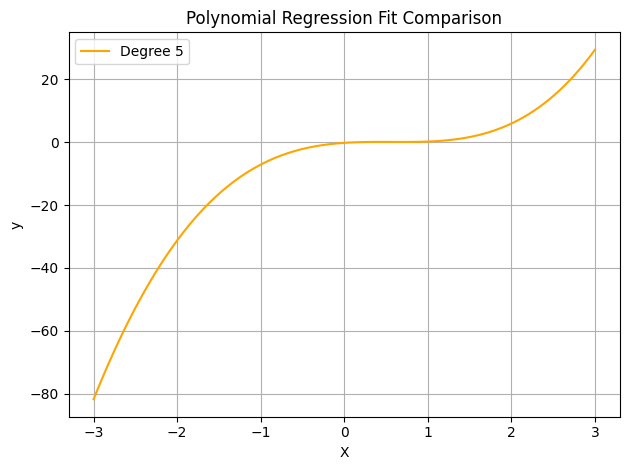

In [294]:
x_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
x_fit_poly = poly.transform(x_fit)
y_fit = model.predict(x_fit_poly)
plt.plot(x_fit, y_fit, color=colors[i], label=f'Degree {degree}')
plt.title("Polynomial Regression Fit Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**12.** Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [295]:
# 1. Generate synthetic data
np.random.seed(42)
n_samples = 100

In [296]:
# Two features: X1 and X2
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(5, 15, n_samples)

In [297]:
# Combine features into matrix X
X = np.column_stack((X1, X2))

In [298]:
# Define true relationship: y = 3*X1 + 2*X2 + noise
noise = np.random.normal(0, 2, n_samples)
y = 3 * X1 + 2 * X2 + noise

In [299]:
X

array([[ 3.74540119,  5.31429186],
       [ 9.50714306, 11.36410411],
       [ 7.31993942,  8.14355981],
       [ 5.98658484, 10.08570691],
       [ 1.5601864 , 14.07566474],
       [ 1.5599452 ,  7.49292229],
       [ 0.58083612,  9.10382923],
       [ 8.66176146, 12.55551139],
       [ 6.01115012,  7.28798165],
       [ 7.08072578,  5.7697991 ],
       [ 0.20584494,  7.89751453],
       [ 9.69909852,  6.61221287],
       [ 8.32442641, 14.29697652],
       [ 2.12339111, 13.0812038 ],
       [ 1.81824967, 11.33403757],
       [ 1.8340451 , 13.7146059 ],
       [ 3.04242243, 13.03672077],
       [ 5.24756432,  6.86570059],
       [ 4.31945019, 13.92558998],
       [ 2.9122914 , 10.39342242],
       [ 6.11852895, 13.07440155],
       [ 1.39493861, 13.960913  ],
       [ 2.92144649,  8.18003475],
       [ 3.66361843,  6.10051925],
       [ 4.56069984,  7.27935163],
       [ 7.85175961,  9.27107789],
       [ 1.99673782, 13.18014766],
       [ 5.14234438, 13.60730583],
       [ 5.92414569,

In [300]:
y

array([20.50473784, 51.71414481, 38.83308282, 36.70246551, 36.56343771,
       20.61334603, 17.56755983, 52.40941436, 30.66005032, 34.35594474,
       18.72975505, 40.68035667, 55.49398453, 33.35814277, 29.76694447,
       36.72493306, 34.70993259, 27.9666218 , 39.03050167, 27.89209847,
       44.35018653, 32.78894577, 25.67779055, 24.84626029, 28.26680656,
       45.00450277, 31.82119512, 48.08198315, 29.16281437, 19.89414332,
       34.43278062, 20.52282475, 13.90192957, 46.64687053, 58.77363032,
       40.57032126, 27.82063807, 23.96084815, 36.90655294, 44.35301406,
       33.33828043, 27.39947566, 21.3229876 , 44.06781302, 21.69249446,
       30.92085769, 31.6590364 , 33.3696805 , 28.14645813, 22.240132  ,
       59.41895904, 40.15282662, 38.32752695, 44.75822564, 48.68007898,
       43.52490438, 27.12758138, 38.81734116, 17.25135057, 36.59536818,
       30.92398487, 32.08937007, 46.902181  , 32.93603192, 18.68818026,
       42.51329519, 19.67260095, 37.96002791, 17.68133927, 47.68

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42)

In [303]:
from sklearn.linear_model import LinearRegression

In [304]:
model = LinearRegression()

In [305]:
model.fit(X_train , y_train)

LinearRegression()

In [306]:
model.coef_

array([2.95000442, 2.15743475])

In [307]:
model.intercept_

np.float64(-1.2006587659898713)

In [308]:
from sklearn.metrics import r2_score

In [309]:
y_pred = model.predict(X_test)

In [310]:
r2_score(y_test , y_pred)

0.9798226841384091

In [311]:
print('model coefficients is:', model.coef_)
print('model intercept is:',model.intercept_)
print('model R-squared score is:', r2_score(y_test , y_pred))

model coefficients is: [2.95000442 2.15743475]
model intercept is: -1.2006587659898713
model R-squared score is: 0.9798226841384091


**13.**Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

In [312]:
np.random.seed(40)
X= np.random.rand(100,1)*10
true_slope = 3.5
true_intercept = 7
noise = np.random.randn(100,1)*4
y = true_slope *X +true_intercept +noise

In [313]:
X

array([[4.07687028],
       [0.5536604 ],
       [7.88534877],
       [2.87305185],
       [4.50350587],
       [3.03912305],
       [5.26399524],
       [6.23812213],
       [7.76775458],
       [6.86241645],
       [9.80938863],
       [6.00816092],
       [8.1396852 ],
       [7.08645152],
       [0.2753468 ],
       [9.04267217],
       [4.49904851],
       [1.18924654],
       [8.35300176],
       [2.02248226],
       [1.74202671],
       [4.4914708 ],
       [6.69794781],
       [9.57399109],
       [8.33333251],
       [5.08309965],
       [6.30023548],
       [8.35034686],
       [4.47331645],
       [7.62290474],
       [6.36922242],
       [3.62295894],
       [0.14574549],
       [5.41984891],
       [3.18155481],
       [1.44990347],
       [5.48891947],
       [1.87481273],
       [3.98981476],
       [2.40038207],
       [0.36654853],
       [5.68544757],
       [9.22764799],
       [1.79055106],
       [7.03077668],
       [7.20012795],
       [0.31064019],
       [5.828

In [314]:
y

array([[24.41385212],
       [ 8.65193129],
       [37.94411579],
       [16.26276591],
       [22.39318029],
       [21.1198342 ],
       [22.06721343],
       [32.12644895],
       [36.99415047],
       [33.41189964],
       [39.30088032],
       [28.57311569],
       [29.52043983],
       [34.24924247],
       [13.44182416],
       [31.83842694],
       [20.67154589],
       [ 6.22354996],
       [24.7115278 ],
       [14.01579479],
       [ 6.32635488],
       [20.24160918],
       [33.94011799],
       [47.38704486],
       [36.30382413],
       [21.39711153],
       [30.12614963],
       [29.2607052 ],
       [23.16257955],
       [33.06099021],
       [32.52004204],
       [16.11511375],
       [ 7.25188211],
       [25.424418  ],
       [17.43986647],
       [17.3611944 ],
       [19.93696851],
       [11.24728812],
       [22.70837611],
       [12.38970201],
       [ 4.58651101],
       [17.15085397],
       [32.94440594],
       [ 9.5548867 ],
       [29.39505231],
       [31

In [315]:
from sklearn.linear_model import LinearRegression

In [316]:
model = LinearRegression()

In [317]:
model.fit(X,y) # fit original datapoint using Linear Regression

LinearRegression()

In [318]:
y_pred = model.predict(X)

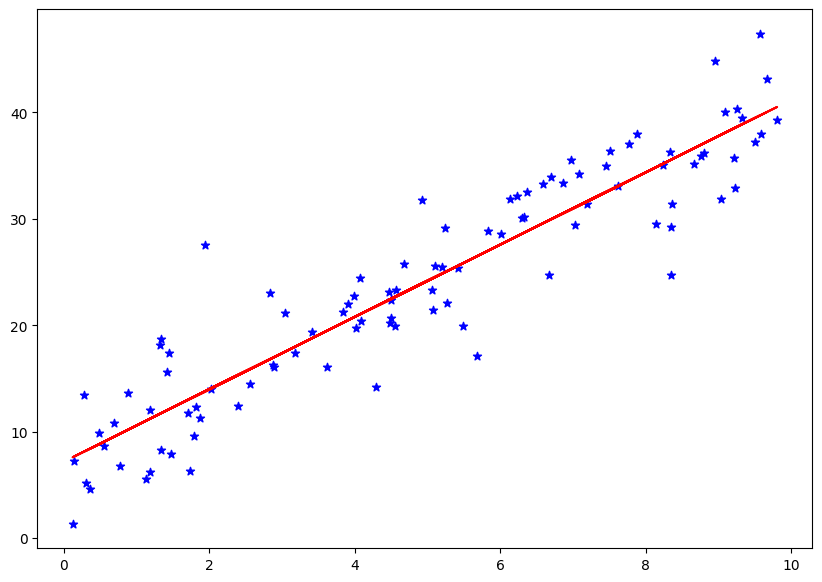

In [319]:
plt.figure(figsize=(10,7))
plt.scatter(X, y , color = 'blue', marker = '*' ,label = 'original datapoint')
plt.plot(X , y_pred , color ='red', label = 'predict')

**14.**Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [320]:
# 1. Generate synthetic data with multicollinearity
np.random.seed(42)
n_samples = 100

In [321]:
# Base features
X1 = np.random.normal(0, 1, n_samples)
X2 = 0.8 * X1 + np.random.normal(0, 0.1, n_samples)  # High collinearity with X1
X3 = np.random.normal(0, 1, n_samples)

In [322]:
# Combine into DataFrame
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3
})

In [323]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [324]:
 #2. Calculate VIF for each feature
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = dataframe.columns
    vif_data['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

vif_result = calculate_vif(df)
print(vif_result)

  Feature        VIF
0      X1  58.845556
1      X2  58.782449
2      X3   1.034520


**15.**Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.




In [325]:
np.random.seed(1)

In [327]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X+1.5*X**2 + np.random.randn(100, 1)

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [329]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 1), (20, 1), (80, 1), (20, 1))

In [330]:
from sklearn.preprocessing import PolynomialFeatures

In [332]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [333]:
X_poly_train

array([[1.77188420e+00, 3.13957361e+00, 5.56296088e+00, 9.85692247e+00],
       [7.60282345e-01, 5.78029244e-01, 4.39465430e-01, 3.34117807e-01],
       [4.68724172e-01, 2.19702350e-01, 1.02979802e-01, 4.82691224e-02],
       [1.23991144e+00, 1.53738037e+00, 1.90621550e+00, 2.36353841e+00],
       [2.48541924e-01, 6.17730880e-02, 1.53532021e-02, 3.81591440e-03],
       [4.65948548e-01, 2.17108049e-01, 1.01161180e-01, 4.71359050e-02],
       [1.81563171e+00, 3.29651849e+00, 5.98526348e+00, 1.08670341e+01],
       [1.68406178e+00, 2.83606409e+00, 4.77610716e+00, 8.04325955e+00],
       [4.51418677e-01, 2.03778822e-01, 9.19895663e-02, 4.15258084e-02],
       [1.72708371e+00, 2.98281814e+00, 5.15157661e+00, 8.89720405e+00],
       [9.72690222e-01, 9.46126268e-01, 9.20287769e-01, 8.95154914e-01],
       [1.89803264e+00, 3.60252791e+00, 6.83771556e+00, 1.29782073e+01],
       [5.04651489e-01, 2.54673125e-01, 1.28521172e-01, 6.48584008e-02],
       [1.86394414e+00, 3.47428775e+00, 6.47587829e

In [334]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()

In [335]:
poly_reg

LinearRegression()

In [336]:
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [337]:
y_poly_predict = poly_reg.predict(X_poly_train)

In [338]:
y_poly_predict

array([[13.81989585],
       [ 7.49541322],
       [ 5.7384481 ],
       [10.4657569 ],
       [ 4.78790987],
       [ 5.72361371],
       [14.16850402],
       [13.17652348],
       [ 5.64687478],
       [13.48321285],
       [ 8.84695503],
       [14.88885852],
       [ 5.93517331],
       [14.57981987],
       [ 9.32278825],
       [ 9.70759452],
       [ 9.74957361],
       [13.24364864],
       [ 5.86726421],
       [12.62317358],
       [ 5.32666998],
       [ 5.42062292],
       [ 6.07784869],
       [12.05950915],
       [ 4.54966368],
       [ 4.86531578],
       [ 4.69570455],
       [ 4.54849085],
       [ 9.66624563],
       [10.42843278],
       [ 4.77058803],
       [11.91897308],
       [13.4320699 ],
       [14.18033419],
       [15.2936991 ],
       [ 4.56230548],
       [ 4.53428668],
       [10.69411546],
       [ 7.20426364],
       [ 9.64354749],
       [10.06162695],
       [ 4.55732045],
       [ 6.70435374],
       [ 4.53775631],
       [11.55262203],
       [14

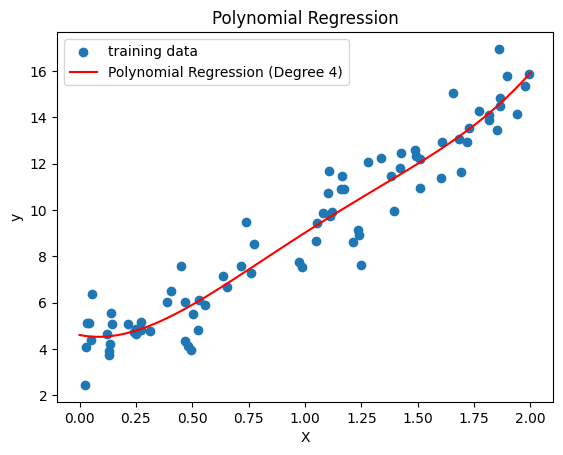

In [339]:
degree = 4
plt.scatter(X_train, y_train, label = "training data")
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, poly_reg.predict(X_range_poly), color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

**16.** Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [340]:
# 1. Generate synthetic data
np.random.seed(42)
n_samples = 200
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(5, 15, n_samples)
X3 = np.random.uniform(1, 20, n_samples)

In [341]:
# Combine into feature matrix
X = np.column_stack((X1, X2, X3))

In [342]:
# Generate target variable: y = 3*X1 + 2*X2 - X3 + noise
noise = np.random.normal(0, 5, n_samples)
y = 3 * X1 + 2 * X2 - 1 * X3 + noise

In [343]:
# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
# 3. Create pipeline: standardization + linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Standardize the features
    ('regressor', LinearRegression())        # Step 2: Fit linear regression
])

In [345]:
# 4. Fit the pipeline to training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [346]:
# 5. Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [347]:
# 6. Print results
print("R-squared score on test set:", round(r2, 4))

R-squared score on test set: 0.896


**17.** Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

In [348]:
np.random.seed(1)

In [349]:
#generate synthtic X
X = 2*np.random.rand(100, 1)

In [350]:
#generate random synthetic y using X
y = 4 + 3*X+1.5*X**2 + np.random.randn(100, 1)

In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [352]:
from sklearn.preprocessing import PolynomialFeatures

In [353]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

In [354]:
X_poly_train

array([[2.28749635e-04, 5.23263954e-08, 1.19696438e-11],
       [1.61478258e+00, 2.60752277e+00, 4.21058234e+00],
       [1.14735897e+00, 1.31643261e+00, 1.51042077e+00],
       [1.38880032e+00, 1.92876632e+00, 2.67867127e+00],
       [3.96202978e-01, 1.56976800e-01, 6.21946756e-02],
       [6.31031262e-01, 3.98200454e-01, 2.51276935e-01],
       [8.16273606e-01, 6.66302599e-01, 5.43885225e-01],
       [7.81095665e-02, 6.10110437e-03, 4.76554618e-04],
       [1.81719101e+00, 3.30218315e+00, 6.00069753e+00],
       [3.65765547e-02, 1.33784435e-03, 4.89337371e-05],
       [1.02977822e+00, 1.06044319e+00, 1.09202131e+00],
       [1.23428983e+00, 1.52347138e+00, 1.88040522e+00],
       [9.83146319e-01, 9.66576684e-01, 9.50286308e-01],
       [4.74053960e-01, 2.24727157e-01, 1.06532799e-01],
       [1.32688300e+00, 1.76061848e+00, 2.33613473e+00],
       [1.97772218e+00, 3.91138501e+00, 7.73563289e+00],
       [5.75550677e-01, 3.31258582e-01, 1.90656101e-01],
       [1.39951672e+00, 1.95864

In [355]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()

In [356]:
poly_reg

LinearRegression()

In [357]:
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [358]:
poly_reg.coef_

array([[ 0.82717662,  3.64351837, -0.61948795]])

In [359]:
poly_reg.intercept_

array([4.56899387])

In [360]:
y_poly_predict = poly_reg.predict(X_poly_train)

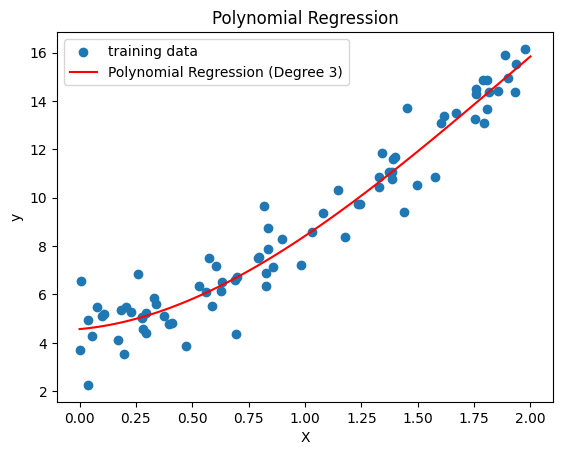

In [361]:
degree = 3
plt.scatter(X_train, y_train, label = "training data")
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, poly_reg.predict(X_range_poly), color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

**18.** Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.

In [362]:
np.random.seed(1)

In [363]:
n_smaple = 200

In [364]:
X1 = np.random.uniform(0, 10, n_samples)
X2 = np.random.uniform(5, 15, n_samples)
X3 = np.random.uniform(1, 20, n_samples)
X4 = np.random.uniform(-5, 5, n_samples)
X5 = np.random.uniform(0, 100, n_samples)

In [365]:
X = np.column_stack((X1, X2, X3, X4, X5))

In [366]:
noise = np.random.normal(0, 5, n_samples)
y = 3*X1 + 2*X2 - X3 + 0.5*X4 + 0.1*X5 + noise

In [367]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [368]:
r2 = r2_score(y, y_pred)

In [369]:
print("Coefficients:", model.coef_)
print("Intercept:   ", model.intercept_)
print("R² Score:    ", round(r2, 4))

Coefficients: [ 2.99954271  2.08893002 -0.98016489  0.49441863  0.09940474]
Intercept:    -0.7096479815603693
R² Score:     0.8876


**19.** Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

In [370]:
np.random.seed(1)
X = np.random.rand(100,1)*10
true_slope =3.5
true_intercept =7

In [371]:
noise = np.random.rand(100,1)*4

In [375]:
y = true_slope *X +true_slope +noise

In [373]:
X

array([[4.17022005e+00],
       [7.20324493e+00],
       [1.14374817e-03],
       [3.02332573e+00],
       [1.46755891e+00],
       [9.23385948e-01],
       [1.86260211e+00],
       [3.45560727e+00],
       [3.96767474e+00],
       [5.38816734e+00],
       [4.19194514e+00],
       [6.85219500e+00],
       [2.04452250e+00],
       [8.78117436e+00],
       [2.73875932e-01],
       [6.70467510e+00],
       [4.17304802e+00],
       [5.58689828e+00],
       [1.40386939e+00],
       [1.98101489e+00],
       [8.00744569e+00],
       [9.68261576e+00],
       [3.13424178e+00],
       [6.92322616e+00],
       [8.76389152e+00],
       [8.94606664e+00],
       [8.50442114e-01],
       [3.90547832e-01],
       [1.69830420e+00],
       [8.78142503e+00],
       [9.83468338e-01],
       [4.21107625e+00],
       [9.57889530e+00],
       [5.33165285e+00],
       [6.91877114e+00],
       [3.15515631e+00],
       [6.86500928e+00],
       [8.34625672e+00],
       [1.82882773e-01],
       [7.50144315e+00],


In [377]:
y

array([[2.85764562],
       [4.56920589],
       [3.84411152],
       [2.63607676],
       [4.37440828],
       [3.07045625],
       [0.92206561],
       [5.05443112],
       [4.25389009],
       [5.9057416 ],
       [2.24694558],
       [2.9042015 ],
       [4.6437386 ],
       [5.72162496],
       [0.64616347],
       [5.33325474],
       [4.56741916],
       [5.66816763],
       [3.56725985],
       [1.39138832],
       [2.78175424],
       [3.30962867],
       [1.35349849],
       [3.36181212],
       [6.36927925],
       [5.13914425],
       [2.76642055],
       [3.78528792],
       [1.30618452],
       [4.05116223],
       [2.93807759],
       [5.44170587],
       [5.41778947],
       [1.97408501],
       [5.57816203],
       [2.17844399],
       [5.58792357],
       [4.35531959],
       [3.80903225],
       [5.53891952],
       [5.4915442 ],
       [3.09031787],
       [1.38100273],
       [3.15321181],
       [0.78788553],
       [2.07365709],
       [3.92862386],
       [4.032

In [378]:
from sklearn.linear_model import LinearRegression

In [379]:
model = LinearRegression()

In [381]:
model.fit(X,y)

LinearRegression()

In [382]:
y_pred = model.predict(X)

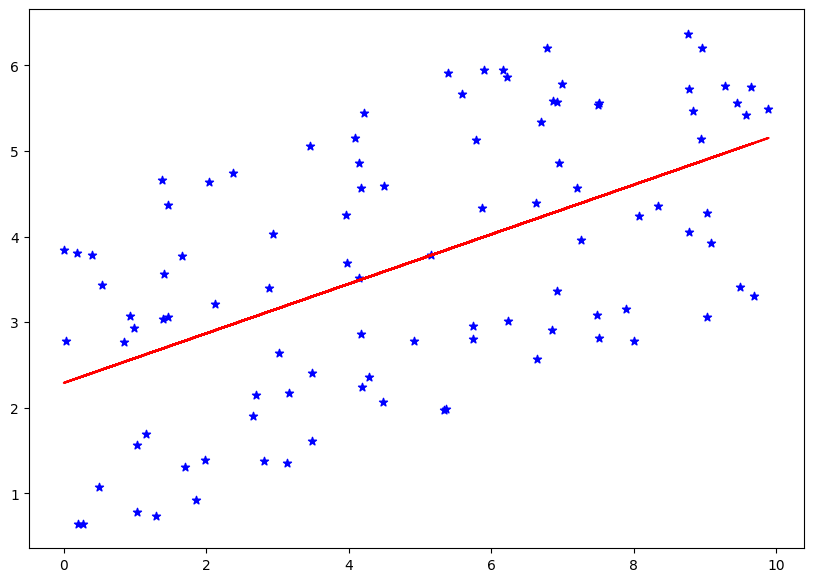

In [383]:
plt.figure(figsize=(10,7))
plt.scatter(X, y , color = 'blue', marker = '*' ,label = 'original datapoint')
plt.plot(X , y_pred , color ='red', label = 'predict')

**20.**Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [384]:
np.random.seed(1)
n_sample =200

In [385]:
X1 = np.random.uniform(0,10, n_sample)
X2 = np.random.uniform(5,10, n_sample)
X3 = np.random.uniform(10,10, n_sample)


In [386]:
X = np.column_stack(( X1, X2, X3))

In [387]:
X

array([[4.17022005e+00, 9.75088060e+00, 1.00000000e+01],
       [7.20324493e+00, 7.78326594e+00, 1.00000000e+01],
       [1.14374817e-03, 9.57803175e+00, 1.00000000e+01],
       [3.02332573e+00, 8.20783104e+00, 1.00000000e+01],
       [1.46755891e+00, 6.95003857e+00, 1.00000000e+01],
       [9.23385948e-01, 7.42995334e+00, 1.00000000e+01],
       [1.86260211e+00, 8.02155241e+00, 1.00000000e+01],
       [3.45560727e+00, 7.74773961e+00, 1.00000000e+01],
       [3.96767474e+00, 9.63090713e+00, 1.00000000e+01],
       [5.38816734e+00, 9.59366718e+00, 1.00000000e+01],
       [4.19194514e+00, 6.97437806e+00, 1.00000000e+01],
       [6.85219500e+00, 9.81631264e+00, 1.00000000e+01],
       [2.04452250e+00, 5.86977833e+00, 1.00000000e+01],
       [8.78117436e+00, 5.63164760e+00, 1.00000000e+01],
       [2.73875932e-01, 5.67539579e+00, 1.00000000e+01],
       [6.70467510e+00, 7.52831083e+00, 1.00000000e+01],
       [4.17304802e+00, 5.10762403e+00, 1.00000000e+01],
       [5.58689828e+00, 9.73985

In [389]:
noise = np.random.normal(0, 3, n_samples)
y = 4*X1 + 2*X2 - 3*X3 + noise

In [390]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [391]:
print("Coefficients:", model.coef_)
print("Intercept:   ", model.intercept_)
print("R² Score:    ", round(r2_score(y, y_pred), 4))

Coefficients: [4.09427294 2.16129097 0.        ]
Intercept:    -31.619170077246995
R² Score:     0.9509


**21.** Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [ ]:
# 1. Generate simple synthetic data
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 3 features
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.normal(0, 1, 100)

In [393]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [394]:
# 3. Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [395]:
import joblib  # for model serialization

In [396]:
# 4. Serialize (save) the model using joblib
joblib.dump(model, 'linear_model.joblib')
print("Model saved as 'linear_model.joblib'.")

Model saved as 'linear_model.joblib'.


In [397]:

# 5. Deserialize (load) the model
loaded_model = joblib.load('linear_model.joblib')
print("Model loaded successfully.")

Model loaded successfully.


In [398]:
# 6. Test the loaded model
y_pred = loaded_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [399]:
print("R² score of loaded model:", round(r2, 4))

R² score of loaded model: 0.9452


**22.** Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [401]:
df = sns.load_dataset('tips')

In [402]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [403]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [404]:
df.duplicated().sum()

np.int64(1)

In [405]:
df = df.drop_duplicates(ignore_index=True).reset_index(drop=True)

In [406]:
df.duplicated().sum()

np.int64(0)

In [463]:
X = df[['total_bill', 'sex', 'smoker', 'day', 'time']]  # include categorical features
y = df['tip']

In [464]:
# 3. Define categorical columns to encode
categorical_features = ['sex', 'smoker', 'day', 'time']

In [465]:
X

,total_bill,sex,smoker,day,time
0,16.99,Female,No,Sun,Dinner
1,10.34,Male,No,Sun,Dinner
2,21.01,Male,No,Sun,Dinner
3,23.68,Male,No,Sun,Dinner
4,24.59,Female,No,Sun,Dinner
...,...,...,...,...,...
238,29.03,Male,No,Sat,Dinner
239,27.18,Female,Yes,Sat,Dinner
240,22.67,Male,Yes,Sat,Dinner
241,17.82,Male,No,Sat,Dinner


In [474]:
from sklearn.compose import ColumnTransformer
# 4. Set up a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid dummy variable trap
    ],
    remainder='passthrough'  # keep the rest of the columns (e.g., 'total_bill') as they are
)


In [467]:
# 5. Create a pipeline: One-hot encoding + Linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [468]:
from sklearn.preprocessing import OneHotEncoder

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [470]:
from sklearn.linear_model import LinearRegression

In [475]:
# 7. Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('regressor', LinearRegression())])

In [476]:
# 8. Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [477]:
# 9. Output results
print("R² score on test set:", round(r2, 4))

R² score on test set: 0.524


**23.** Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [478]:
#genrate same synthetic dp or reproducibility of results
np.random.seed(1)

In [479]:
#generate synthtic X
X = 2*np.random.rand(100, 1)

In [483]:
X

array([[8.34044009e-01],
       [1.44064899e+00],
       [2.28749635e-04],
       [6.04665145e-01],
       [2.93511782e-01],
       [1.84677190e-01],
       [3.72520423e-01],
       [6.91121454e-01],
       [7.93534948e-01],
       [1.07763347e+00],
       [8.38389029e-01],
       [1.37043900e+00],
       [4.08904499e-01],
       [1.75623487e+00],
       [5.47751864e-02],
       [1.34093502e+00],
       [8.34609605e-01],
       [1.11737966e+00],
       [2.80773877e-01],
       [3.96202978e-01],
       [1.60148914e+00],
       [1.93652315e+00],
       [6.26848356e-01],
       [1.38464523e+00],
       [1.75277830e+00],
       [1.78921333e+00],
       [1.70088423e-01],
       [7.81095665e-02],
       [3.39660839e-01],
       [1.75628501e+00],
       [1.96693668e-01],
       [8.42215250e-01],
       [1.91577906e+00],
       [1.06633057e+00],
       [1.38375423e+00],
       [6.31031262e-01],
       [1.37300186e+00],
       [1.66925134e+00],
       [3.65765547e-02],
       [1.50028863e+00],


In [481]:
y =3.5*X+7+np.random.randn(100, 1)*4

In [482]:
y

array([[10.09383001],
       [11.13701448],
       [12.32662907],
       [ 7.96709655],
       [10.7475706 ],
       [ 6.36716377],
       [ 3.21358646],
       [10.67311597],
       [11.79011157],
       [15.94462067],
       [ 9.4925735 ],
       [ 9.32708825],
       [10.68221013],
       [14.10977042],
       [ 8.31437346],
       [11.40082176],
       [14.5624879 ],
       [12.38879966],
       [15.6013434 ],
       [12.83093722],
       [15.24141117],
       [ 7.26807767],
       [11.60324637],
       [13.52738712],
       [16.37853076],
       [17.44001502],
       [ 5.99179671],
       [10.56940596],
       [ 5.93959121],
       [20.96650982],
       [ 2.36062117],
       [ 2.90499913],
       [ 7.10234165],
       [ 7.16993466],
       [ 7.3666782 ],
       [17.03292503],
       [10.4995085 ],
       [ 7.47167655],
       [11.58554985],
       [ 9.90491445],
       [ 8.97461412],
       [15.74051529],
       [11.45655665],
       [10.78512857],
       [13.35274205],
       [10

In [484]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.20 , random_state=1)

In [486]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [487]:
model.fit(X_train, y_train)

LinearRegression()

In [488]:
from sklearn.linear_model import Ridge
ridge_regression_model = Ridge(alpha = 0.1)
ridge_regression_model

Ridge(alpha=0.1)

In [489]:
ridge_regression_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [490]:
ridge_regression_model.coef_

array([3.26734922])

In [492]:
from sklearn.metrics import r2_score

In [496]:
y_pred = ridge_regression_model.predict(X_test)

In [498]:
r2_score(y_test,y_pred)

-0.0675673594815569

**24**.Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [511]:
from sklearn.datasets import make_regression
# 1. Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

In [512]:
# 2. Create Linear Regression model
model = LinearRegression()

In [514]:
from sklearn.model_selection import cross_val_score
# 3. Evaluate using 5-fold cross-validation
# scoring='r2' uses the R² (coefficient of determination) metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [515]:
# 4. Output R² scores
print("R² scores for each fold:", np.round(scores, 4))
print("Average R² score:       ", round(np.mean(scores), 4))

R² scores for each fold: [0.9911 0.9914 0.9867 0.9891 0.9831]
Average R² score:        0.9883


**25.** Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [499]:
# 1. Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 * X**3 - 3 * X**2 + X + np.random.normal(0, 3, size=X.shape)

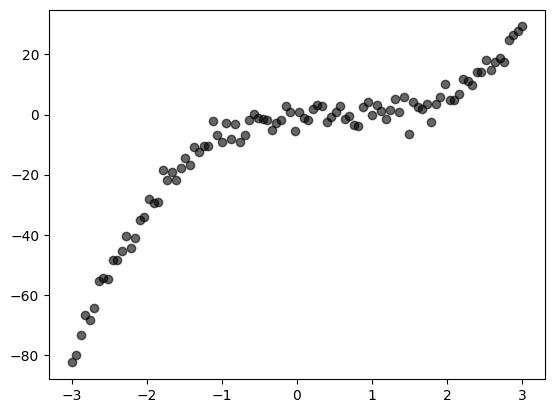

In [501]:
plt.scatter(X, y, color='black', label='Data', alpha=0.6)

In [502]:
# 2. Fit and evaluate polynomial models
degrees = [1, 2, 3, 4, 5]
colors = ['red', 'green', 'blue', 'purple', 'orange']

print("Degree | MSE     | R² Score")
print("----------------------------")
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

Degree | MSE     | R² Score
----------------------------


In [504]:
# Fit linear regression on transformed features
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

In [505]:
 # Compute performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [506]:
print(f"{degree:^6} | {mse:7.2f} | {r2:8.4f}")

  5    |    6.87 |   0.9882


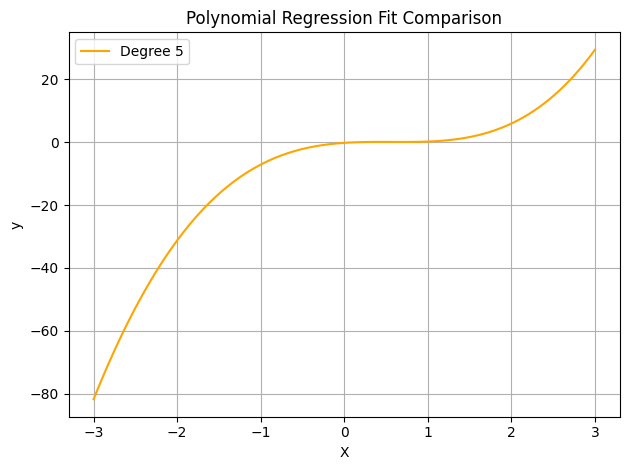

In [507]:
# Plot model
x_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
x_fit_poly = poly.transform(x_fit)
y_fit = model.predict(x_fit_poly)
plt.plot(x_fit, y_fit, color=colors[i], label=f'Degree {degree}')
plt.title("Polynomial Regression Fit Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()